## Low-Rank Matrix Approximation

-A common problem in many areas of large-scale machine learning involves deriving a useful and efficient approximation of a large matrix. 

-This matrix may be the Gram matrix associated to a positive definite kernel in kernel-based algorithms in classification, dimensionality reduction, or some other large matrix arising in other learning tasks such as clustering, collaborative filtering, or matrix completion. 

-For these large-scale problems, the number of matrix entries can be in the order of tens of thousands to millions. So we need to find alternative ways to approximate these SVD matricies

In [1]:
import numpy as np

In [2]:
def low_rank_approx(SVD=None, A=None, r=1):
    """
    Computes an r-rank approximation of a matrix
    given the component u, s, and v of it's SVD
    Requires: numpy
    """
    if not SVD:
        SVD = np.linalg.svd(A, full_matrices=False)
    u, s, v = SVD
    Ar = np.zeros((len(u), len(v)))
    for i in range(r):
        Ar += s[i] * np.outer(u.T[i], v[i])
    return Ar

0.39
0.59
0.78
0.98
1.17
1.37
1.56
1.76
1.95
2.15
2.34
2.54
2.73
2.93
3.12
3.32
3.52
3.71
3.91
4.10
4.30
4.49
4.69
4.88
5.08
5.27
5.47
5.66
5.86
6.05
6.25
6.45
6.64
6.84
7.03
7.23
7.42
7.62
7.81
8.01


KeyboardInterrupt: 

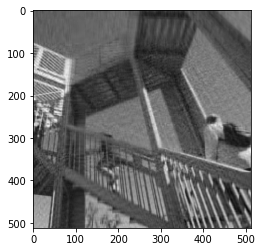

In [3]:
if __name__ == "__main__":
    """
    Test: visualize an r-rank approximation of `ascent`
    for increasing values of r
    Requires: scipy, matplotlib
    """
    from scipy.misc import ascent
    import matplotlib.pyplot as plt
    x = ascent()
    u, s, v = np.linalg.svd(x, full_matrices=False)
    i = 1
    plt.figure()
    plt.ion()
    while i < len(x) - 1:
        y = low_rank_approx((u, s, v), r=i)
        plt.imshow(y, cmap='gray')
        plt.draw()
        i += 1
        #print percentage of singular spectrum used in approximation
        print("{:.2f}".format(100 * i / 512.))